# Fisher-Kolmogoroff equation

$$
\frac{\partial n(x,y,t)}{\partial t}=rn(x,y,t)(1-\frac{n(x,y,t)}{k})+D(\bigtriangledown ^{2}n(x,y,t))
$$
where k,r and D are constants



#  2D 

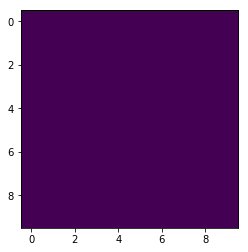

In [2]:
# -*- coding: utf-8 -*-
% matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import *
from random import randint
import matplotlib.animation as animation
Lx=1
Ly=1
Ny=10
Nx=10
dy=Ly/Ny
dx = Lx/Nx  # space step
D=0.01
r=0.01
k=1
NT=4000
T = 300.0  # total time
dt= T/NT 
#dt = .9 * dx**2/2  # time step
n = int(T/dt)

N = np.zeros((Nx, Ny))
N[np.random.randint(0, Nx),np.random.randint(0, Ny)]= 0.01  #the random initial concentration 

def laplacian(Z):
    Zxless = Z[0:-2,1:-1]
    Zyless = Z[1:-1,0:-2]
    Zxplus = Z[2:,1:-1]
    Zyplus = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return ((Zxless+ Zxplus - 2 * Zcenter)/ dx**2 ) + (Zyless + Zyplus -2* Zcenter) / dy**2
fig = plt.figure()
ims = []  
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of N
    deltaN = laplacian(N)
    # We take the values of N inside the grid.
    Nc = N[1:-1,1:-1]
    # We update the variables.
    N[1:-1,1:-1] =  Nc + dt * (r*Nc*(1-(Nc/k))+ D*deltaN )
       
    # Neumann conditions: derivatives at the edges
    # are null.
    N[0,:] = N[1,:]
    N[-1,:] = N[-2,:]
    N[:,0] = N[:,1]
    N[:,-1] =  N[:,-2]
    im = plt.imshow(N, animated=True)
    ims.append([im])
#plt.imshow(N, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
#plt.xticks([]); plt.yticks([]);
ani=animation.ArtistAnimation(fig, ims, interval=5, blit=True,repeat_delay=10) 
ani.save('animation2.mp4', fps=100, writer="avconv", codec="libx264")



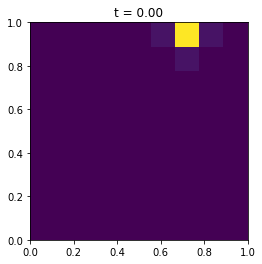

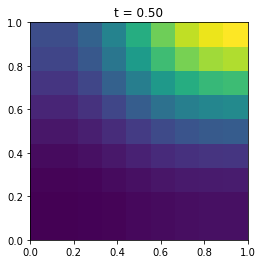

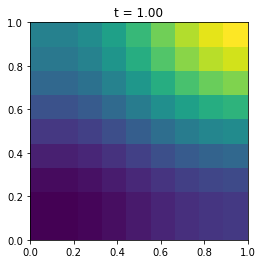

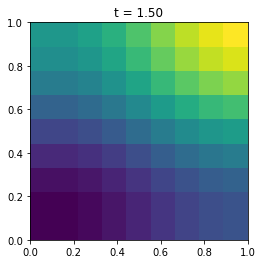

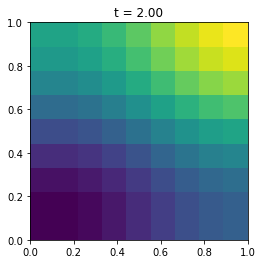

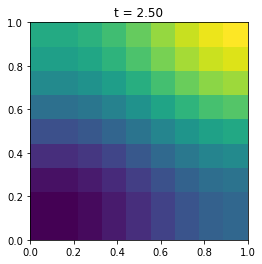

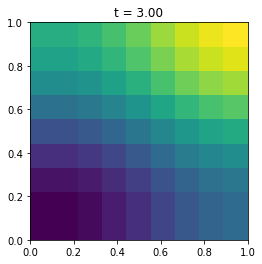

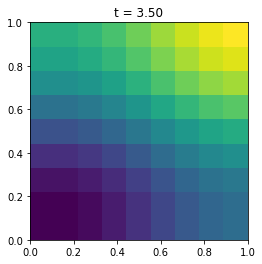

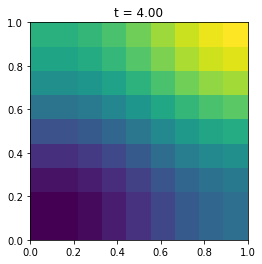

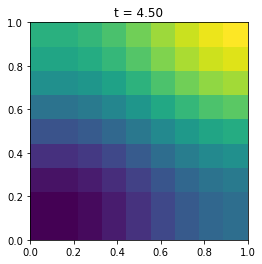

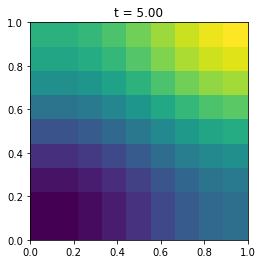

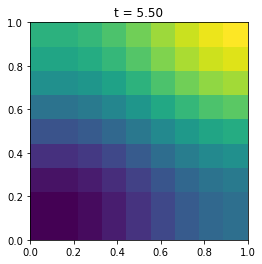

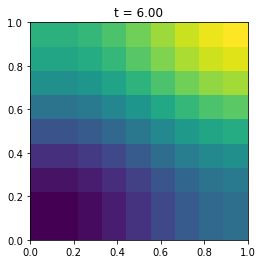

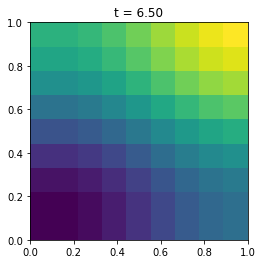

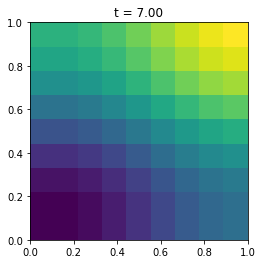

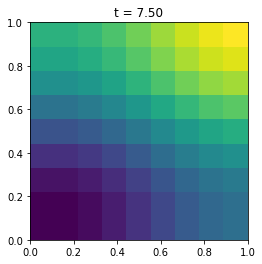

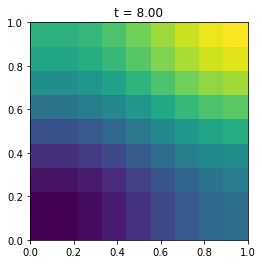

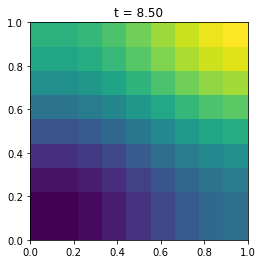

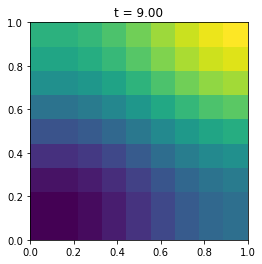

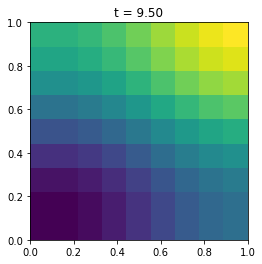

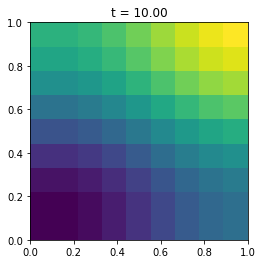

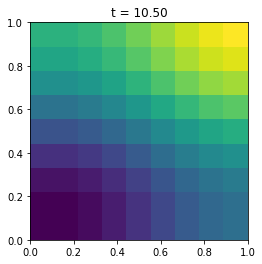

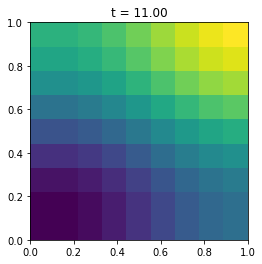

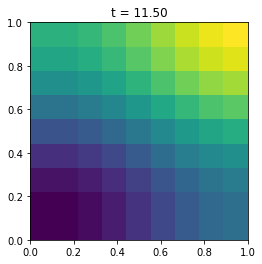

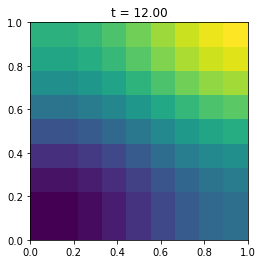

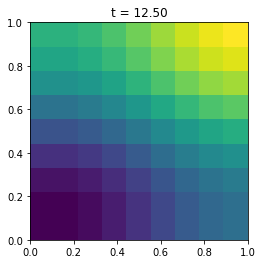

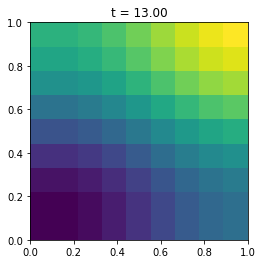

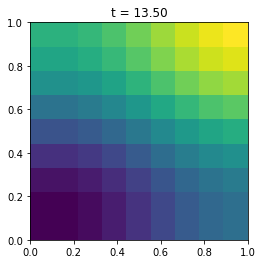

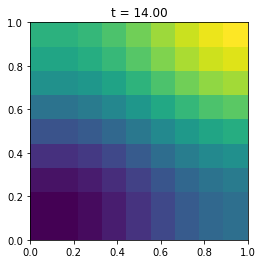

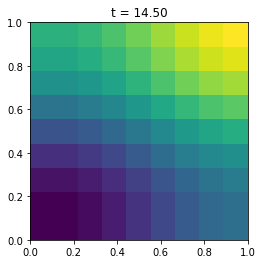

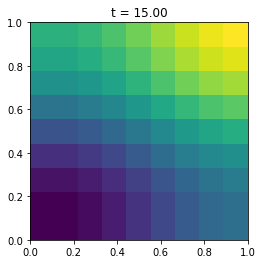

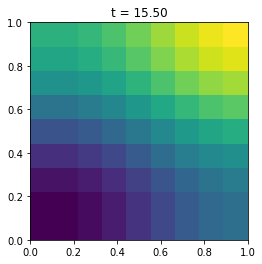

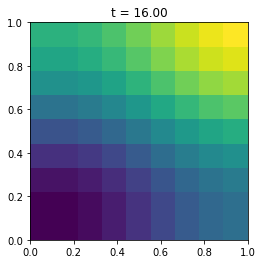

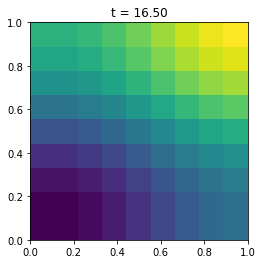

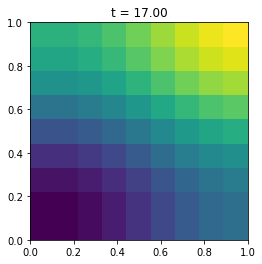

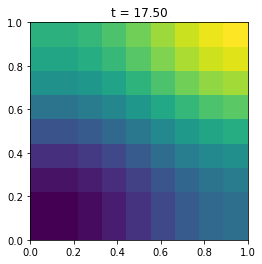

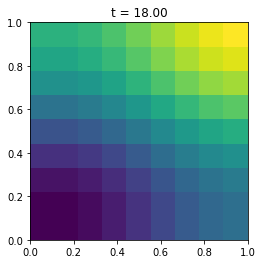

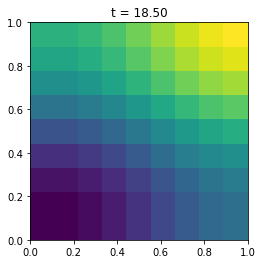

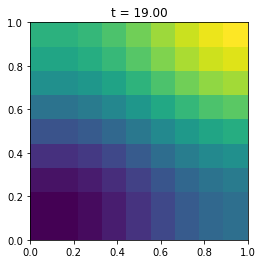

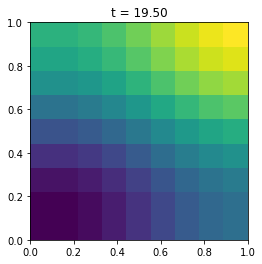

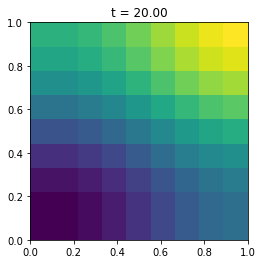

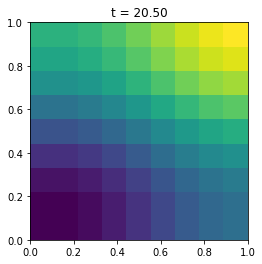

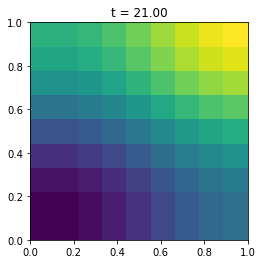

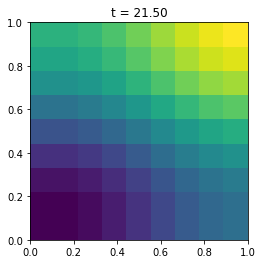

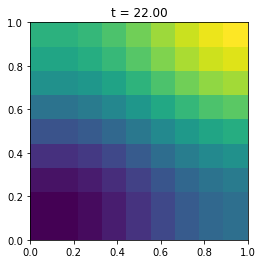

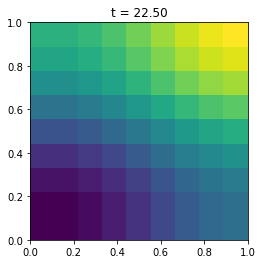

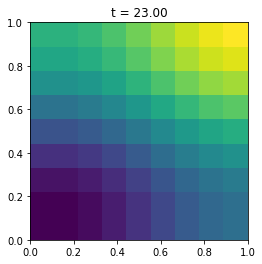

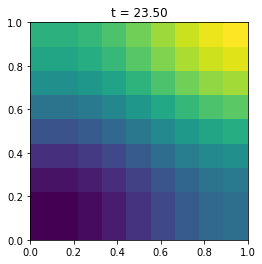

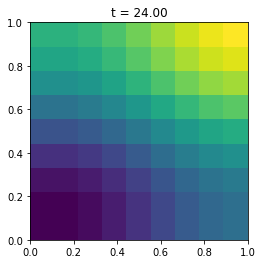

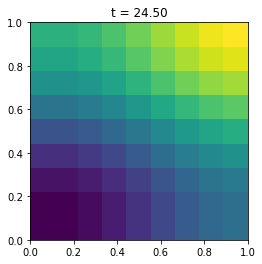

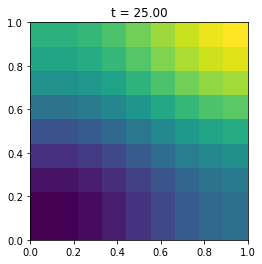

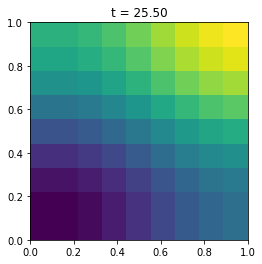

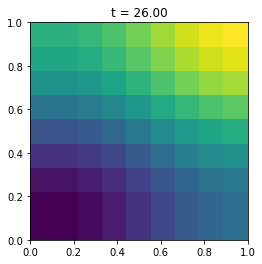

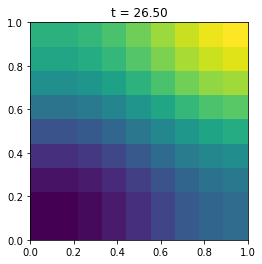

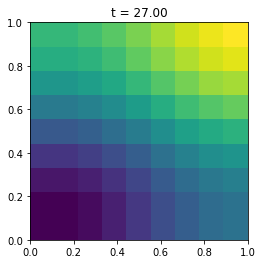

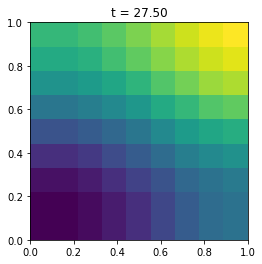

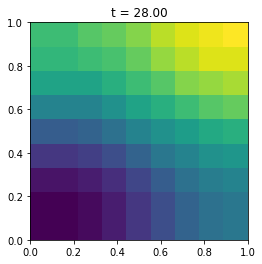

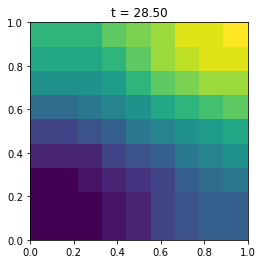

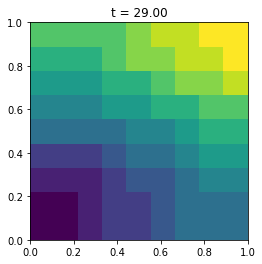

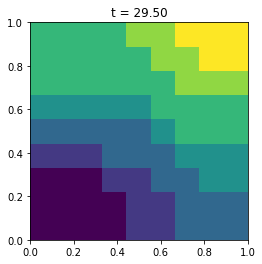

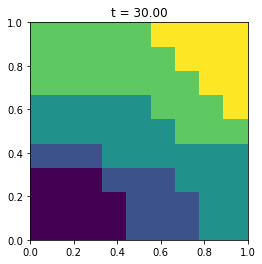

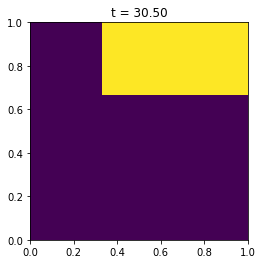

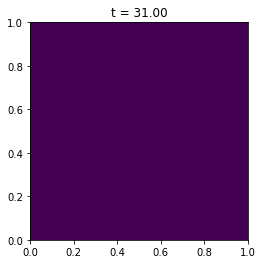

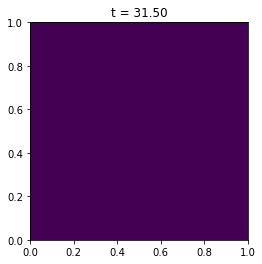

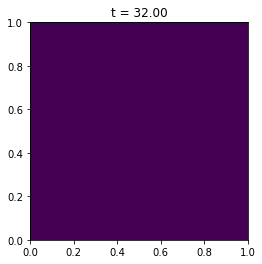

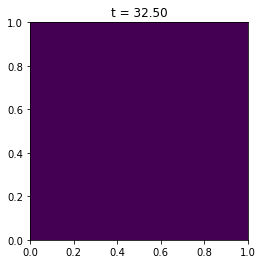

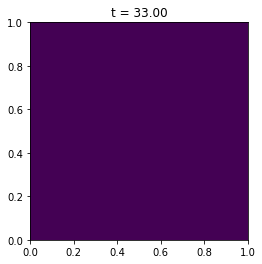

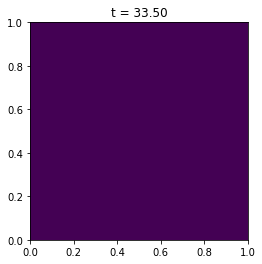

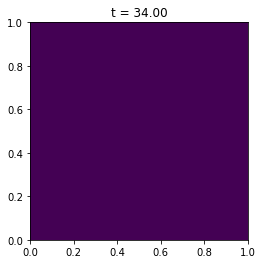

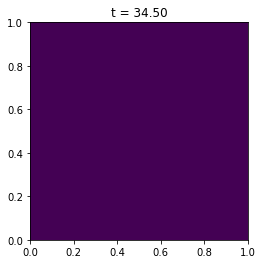

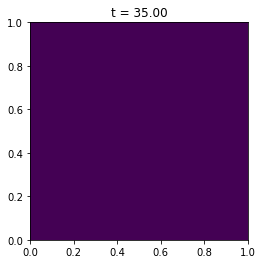

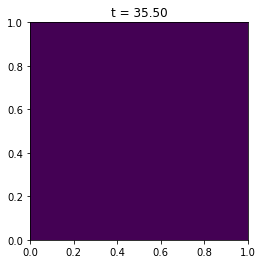

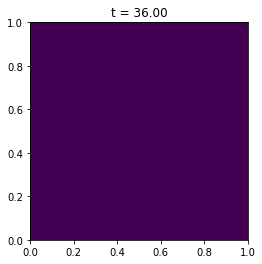

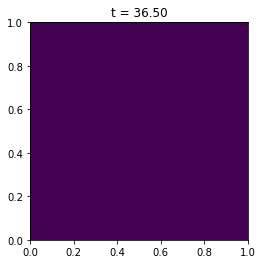

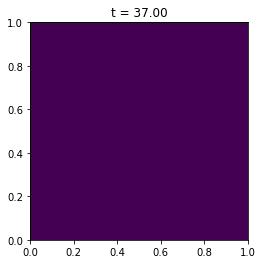

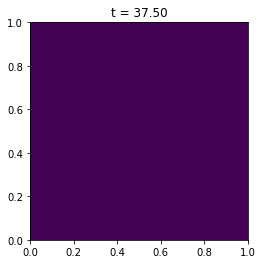

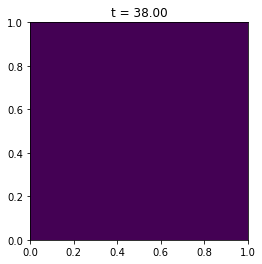

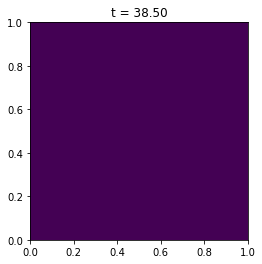

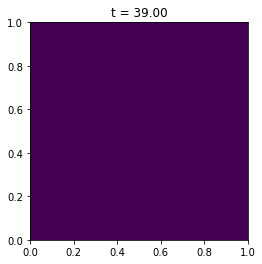

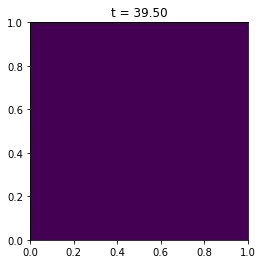

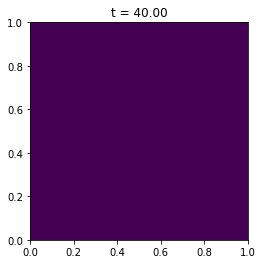

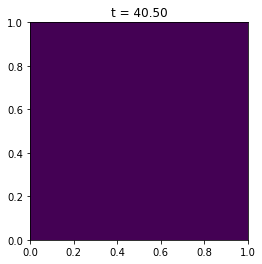

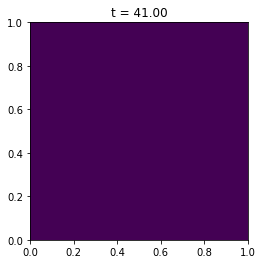

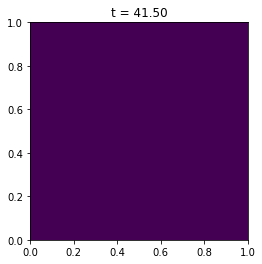

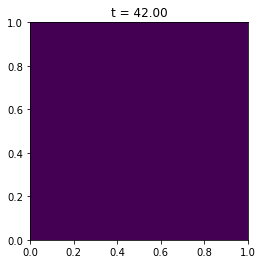

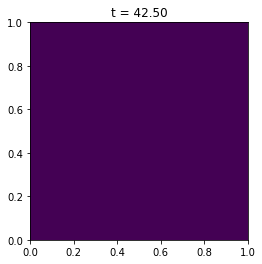

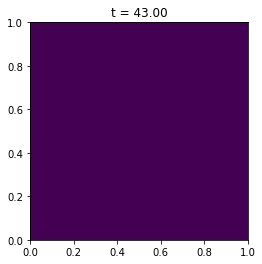

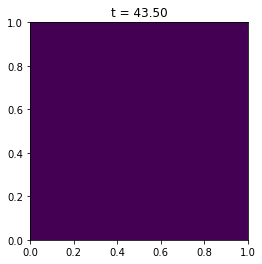

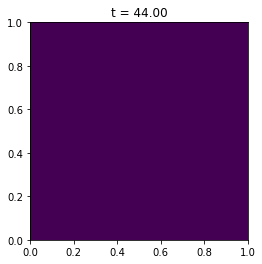

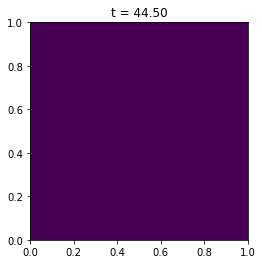

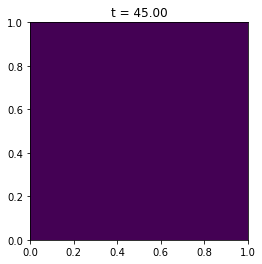

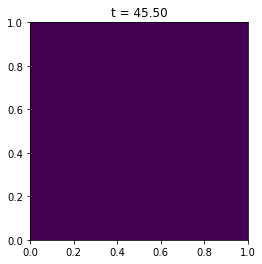

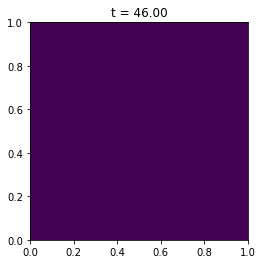

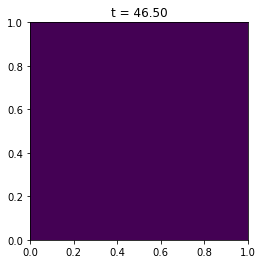

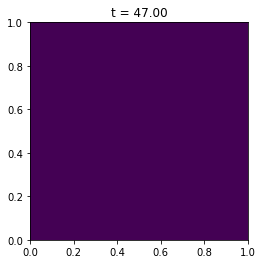

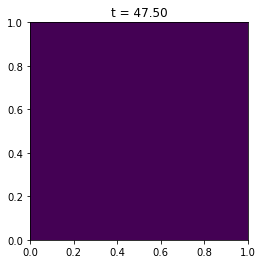

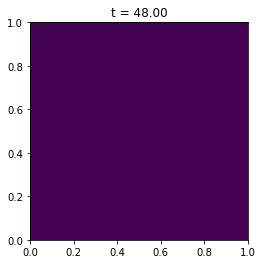

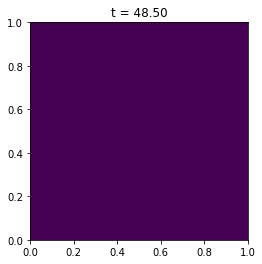

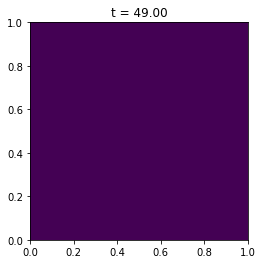

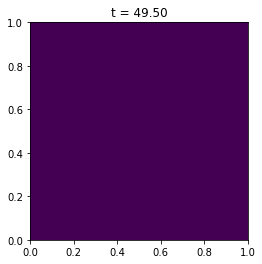

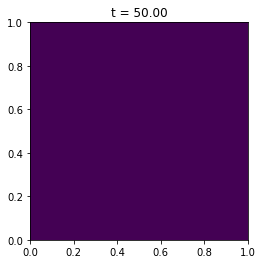

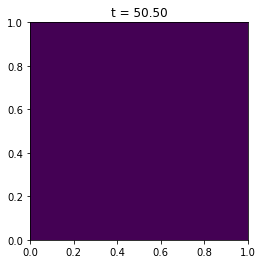

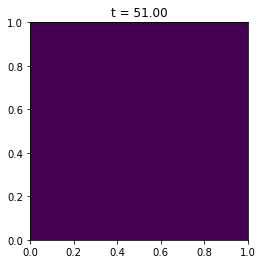

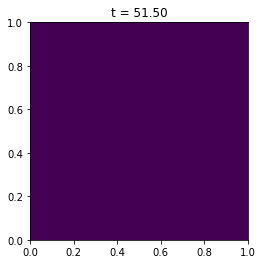

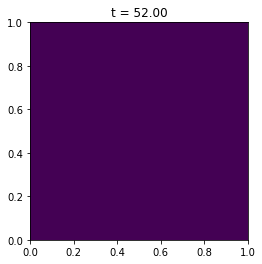

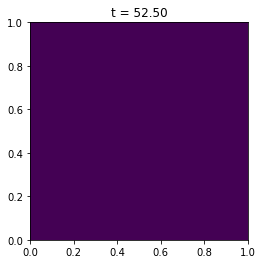

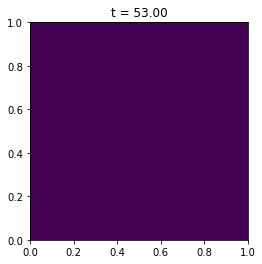

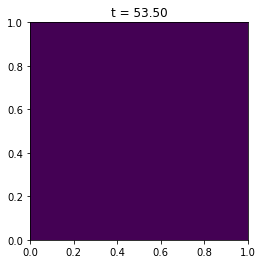

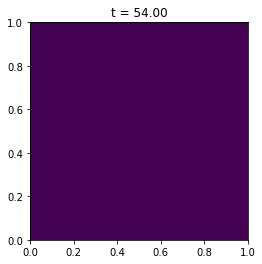

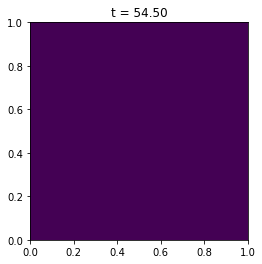

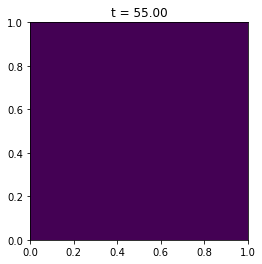

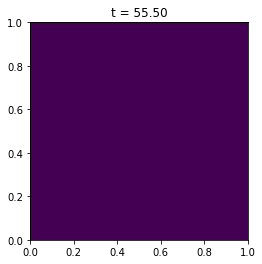

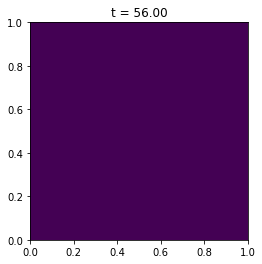

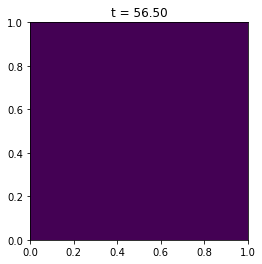

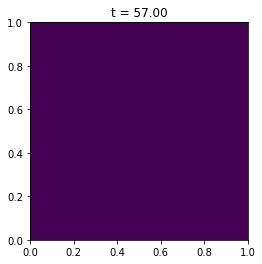

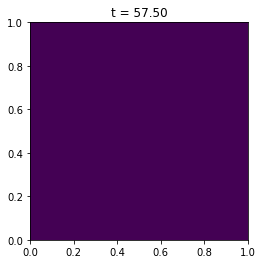

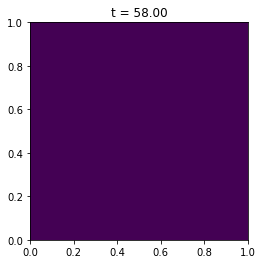

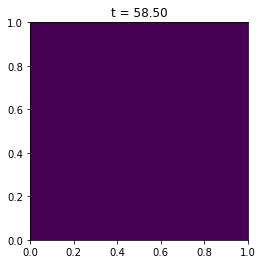

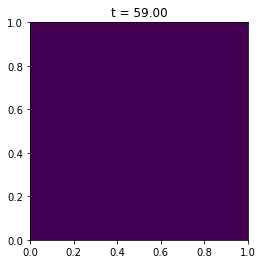

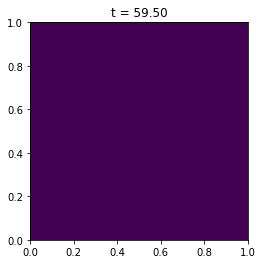

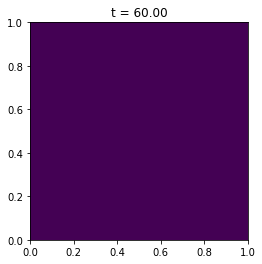

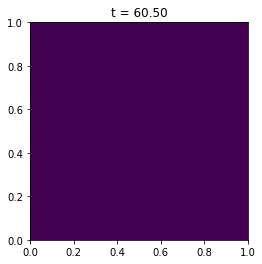

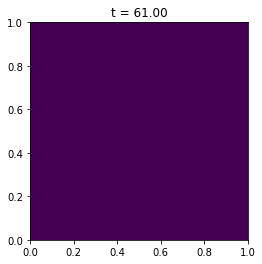

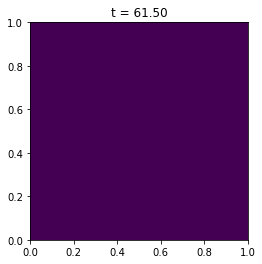

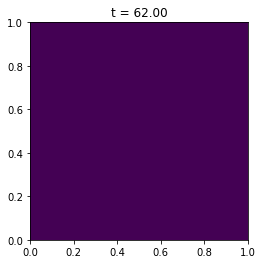

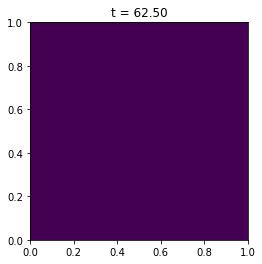

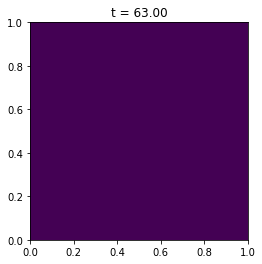

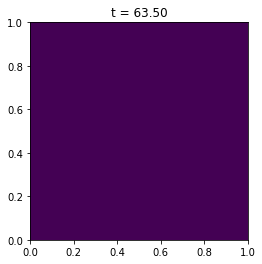

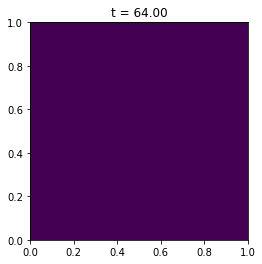

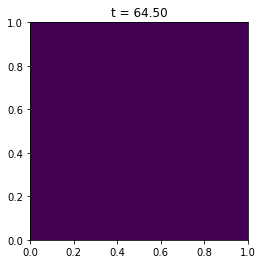

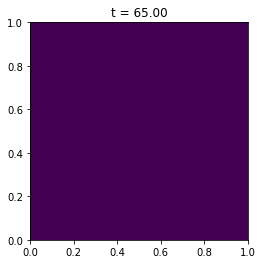

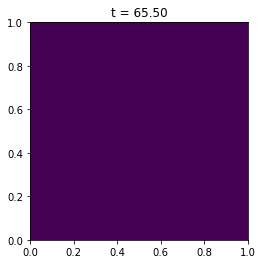

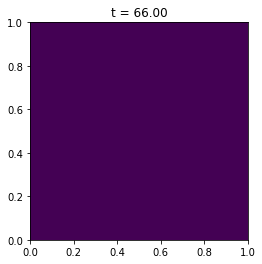

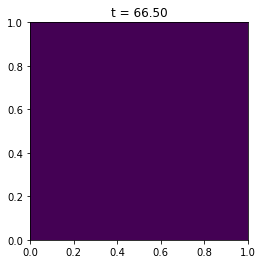

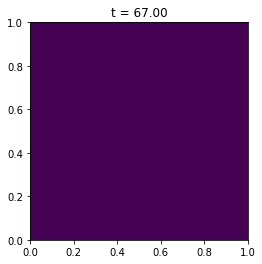

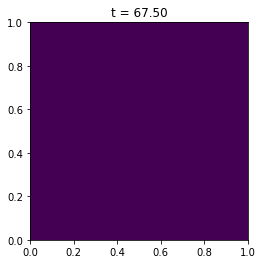

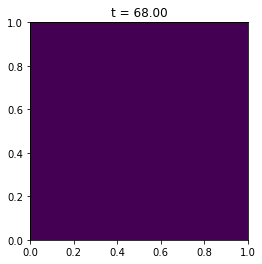

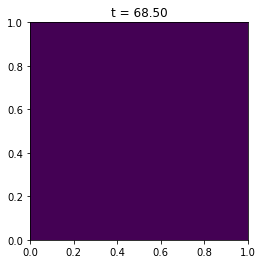

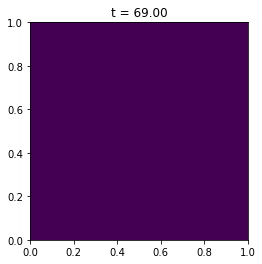

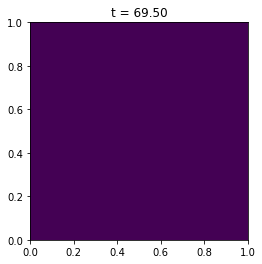

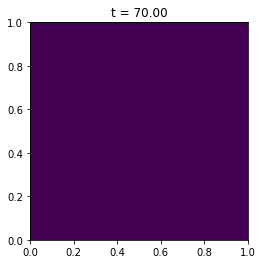

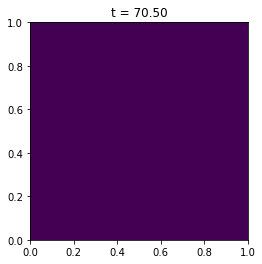

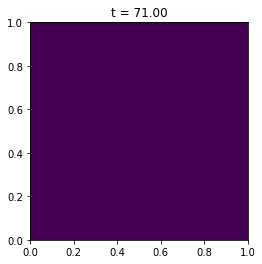

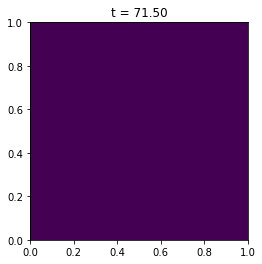

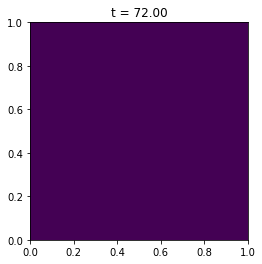

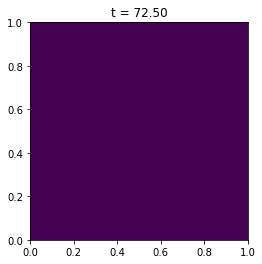

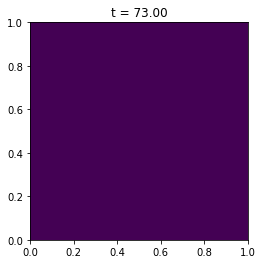

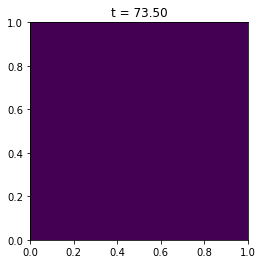

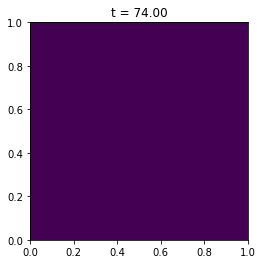

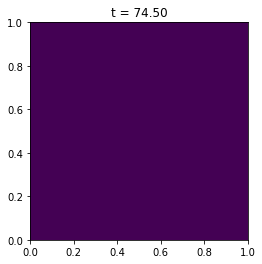

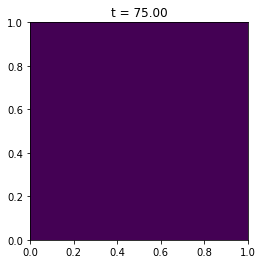

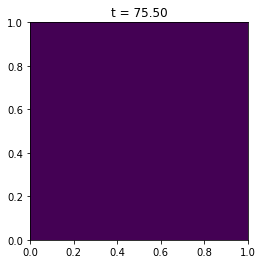

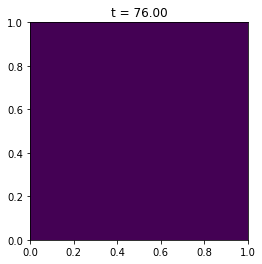

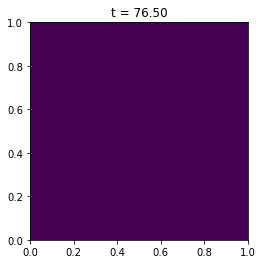

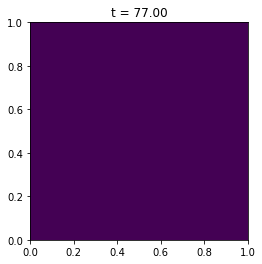

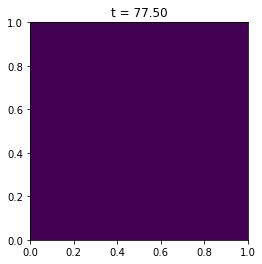

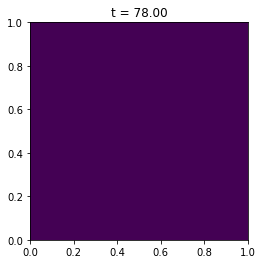

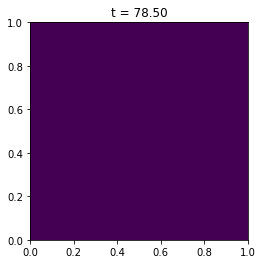

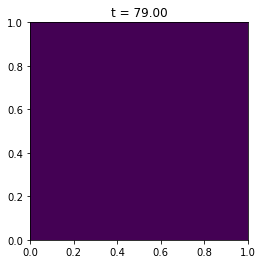

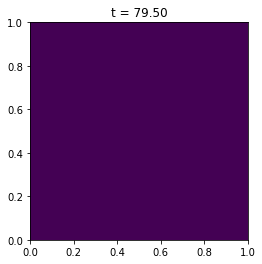

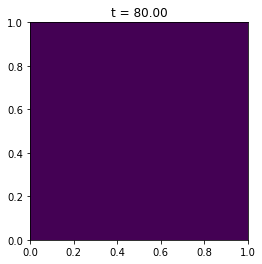

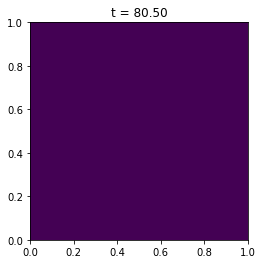

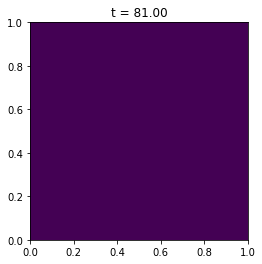

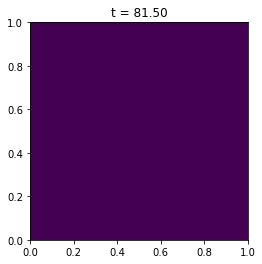

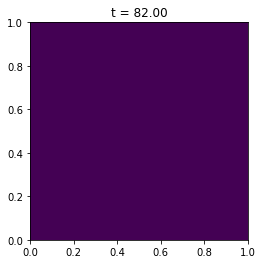

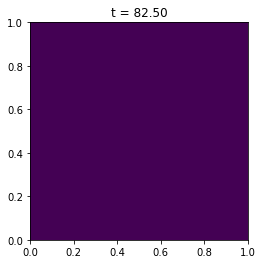

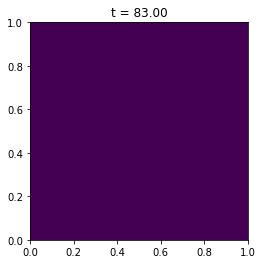

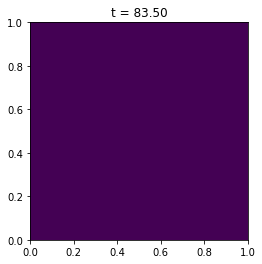

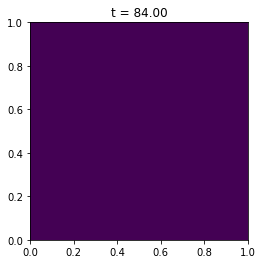

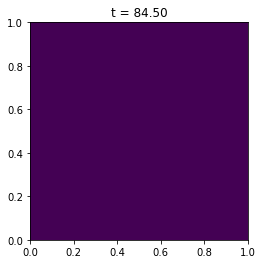

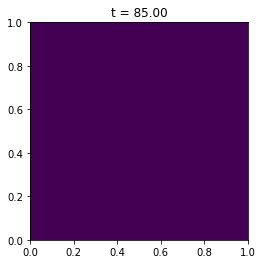

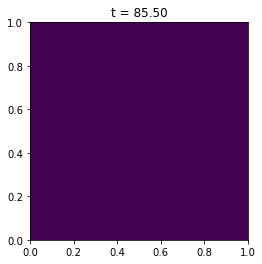

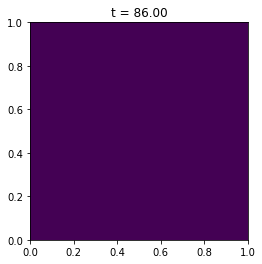

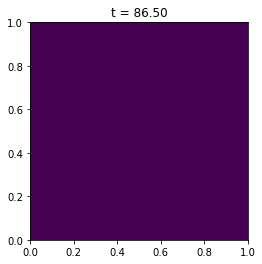

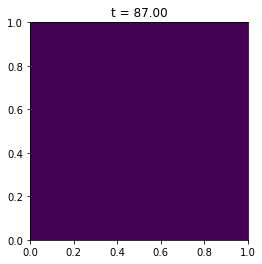

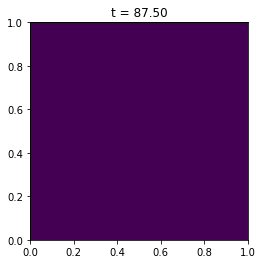

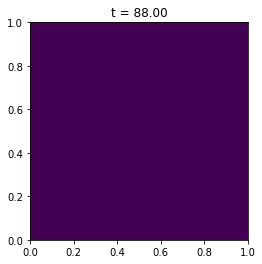

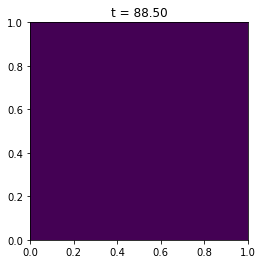

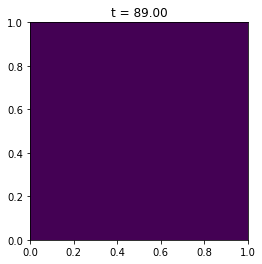

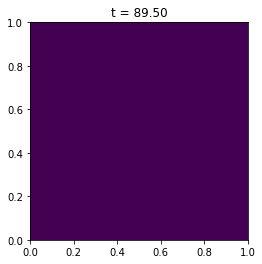

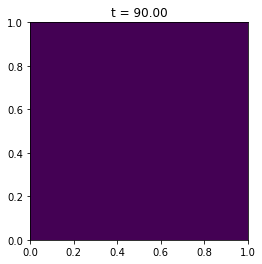

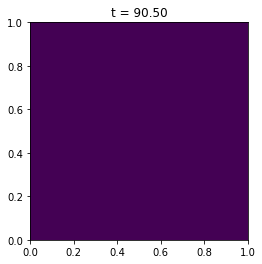

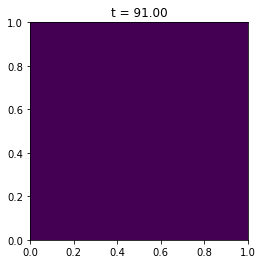

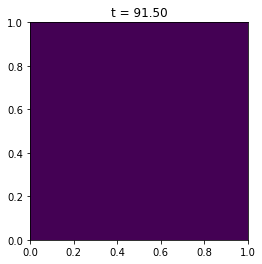

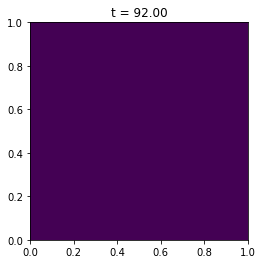

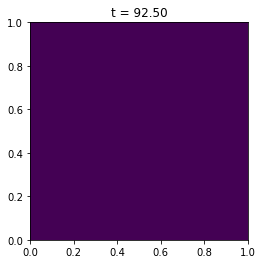

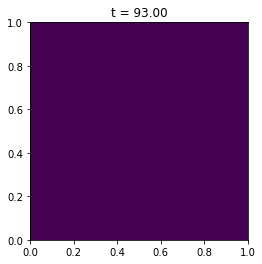

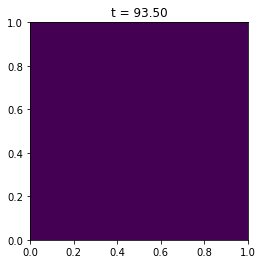

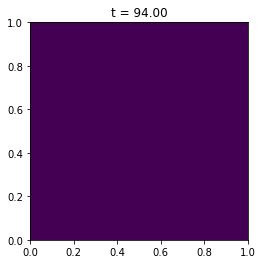

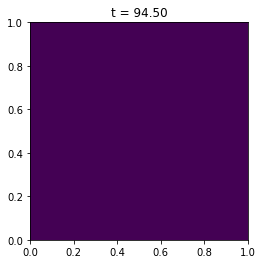

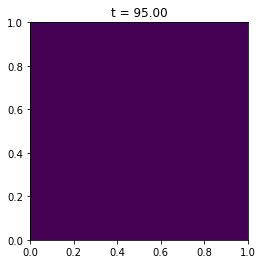

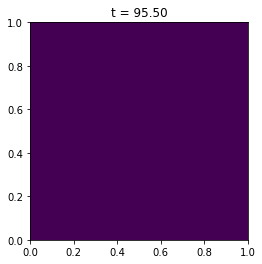

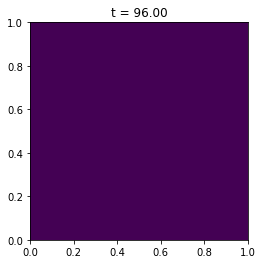

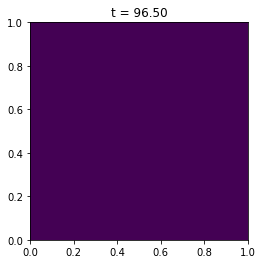

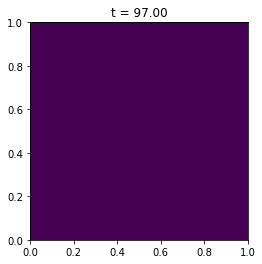

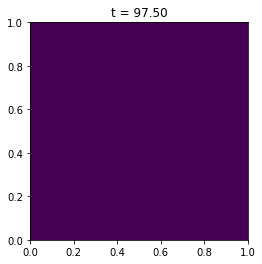

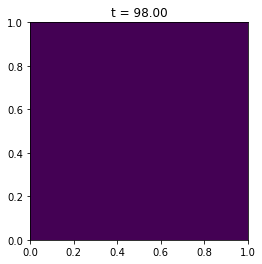

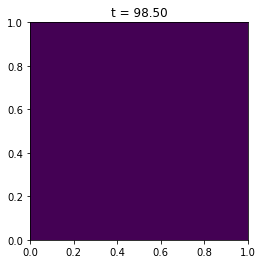

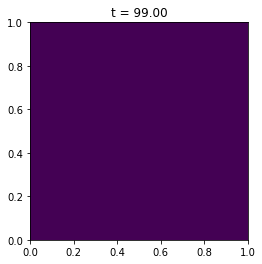

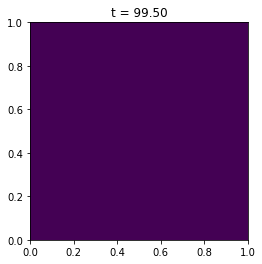

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

if 'qt' in plt.get_backend().lower():
    try:
        from PyQt4 import QtGui
    except ImportError:
        from PySide import QtGui


# PHYSICAL PARAMETERS
Lx = 1.0   #Domain size x
Ly = 1.0   #Domain size y
Time = 100 #Integration time
D=0.1

# NUMERICAL PARAMETERS

NT = 20000     #Number of time steps
NX = 10        #Number of grid points in x
NY = 10        #Number of grid points in y
dt = Time/NT   #Grid step (time)
dx = Lx/(NX-1) #Grid step in x (space)
dy = Ly/(NY-1) #Grid step in y (space)

xx = np.linspace(0,Lx,NX)
yy = np.linspace(0,Ly,NY)

plt.ion()
plt.figure()

### MAIN PROGRAM ###

N = np.zeros((NX,NY))
N[np.random.randint(0, NX),np.random.randint(0, NY)]= 0.01


fig = plt.figure()
ims = []   
    
       

# Main loop
for n in range(0,NT):
    deltaN = laplacian(N)
    # We take the values of N inside the grid.
    Nc = N[1:-1,1:-1]
    # We update the variables.
    N[1:-1,1:-1] =  Nc + dt * (r*Nc*(1-(Nc/k))+ D*deltaN )
    N[0,:] = N[1,:]
    N[-1,:] = N[-2,:]
    N[:,0] = N[:,1]
    N[:,-1] =  N[:,-2]

#Plot every 100 time steps
    if (n%100 == 0):
        plotlabel = "t = %1.2f" %(n * dt)
        plt.pcolormesh(xx,yy,N, shading='flat')
        plt.title(plotlabel)
        plt.axis('image')
        plt.draw()
        plt.show()
        if 'qt' in plt.get_backend().lower():
            QtGui.qApp.processEvents()
           


plt.show()



[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.74186541e-09   5.45057413e-09   8.09340552e-09
    1.06385036e-08   1.30552914e-08   1.53148637e-08   1.73903531e-08
    1.92572620e-08   2.08937580e-08   2.22809268e-08   2.34029815e-08
    2.42474256e-08   2.48051681e-08   2.50705926e-08   2.50415802e-08
    2.47194873e-08   2.41090829e-08   2.32184457e-08   2.20588264e-08
    2.06444782e-08   1.89924590e-08   1.71224087e-08   1.50563067e-08
    1.28182115e-08   1.04339866e-08   7.93101429e-09 

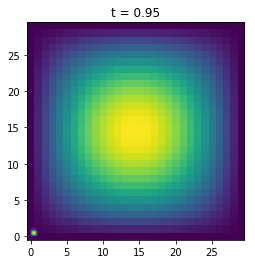

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
% matplotlib inline

if 'qt' in plt.get_backend().lower():
    try:
        from PyQt4 import QtGui
    except ImportError:
        from PySide import QtGui


# PHYSICAL PARAMETERS
Lx = 1.0   #Domain size x
Ly = 1.0   #Domain size y
Time = 20 #Integration time


# NUMERICAL PARAMETERS

NT = 5000      #Number of time steps
NX = 30        #Number of grid points in x
NY = 30        #Number of grid points in y
dt = Time/NT   #Grid step (time)
dx = Lx/(NX-1) #Grid step in x (space)
dy = Ly/(NY-1) #Grid step in y (space)

xx = np.linspace(0,Lx,NX)
yy = np.linspace(0,Ly,NY)

plt.ion()
plt.figure()

### MAIN PROGRAM ###

N = np.zeros((NX,NY))
N[np.random.randint(0, NX),np.random.randint(0, NY)]= 0.01


fig = plt.figure()
ims = []    
       

# Main loop
for n in range(0,NT):
    deltaN = laplacian(N)
    # We take the values of N inside the grid.
    Nc = N[1:-1,1:-1]
    # We update the variables.
    N[1:-1,1:-1] =  Nc + dt * (r*Nc*(1-(Nc/k))+ D*deltaN )


#Plot every 100 time steps
    if (n%100 == 0):
        #plotlabel = "t = %1.2f" %(n * dt)
        plt.pcolormesh(xx,yy,N, shading='flat')
        plt.title(plotlabel)
        plt.axis('image')
        plt.draw()
        im = plt.imshow(N, animated=True)
        ims.append([im])
        if 'qt' in plt.get_backend().lower():
            QtGui.qApp.processEvents()
            

ani=animation.ArtistAnimation(fig, ims, interval=5, blit=True,repeat_delay=10) 
ani.save('animation.mp4', fps=10, writer="avconv", codec="libx264")


print(N)
